# Day 60 – Multivariate Analysis & Feature Insights
Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Fill missing values (Future-proof way)

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
# Encoding Categorical Variables

df_encoded = pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True)

print("Encoded Dataset Preview:")
df_encoded.head()


Encoded Dataset Preview:


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


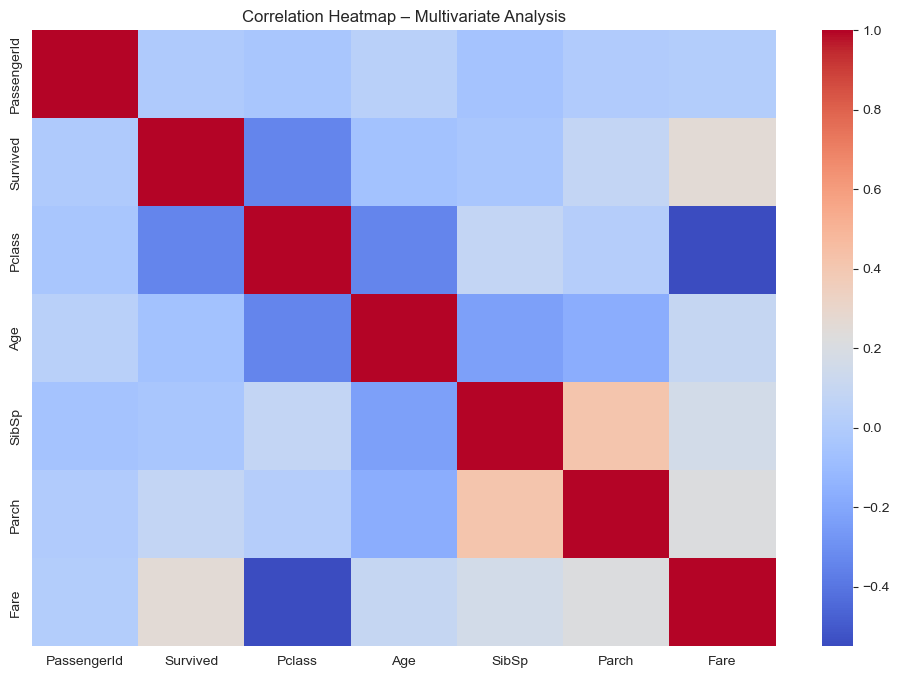

In [9]:
# Multivariate Correlation Heatmap

numeric_df = df_encoded.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(12,8))
corr = numeric_df.corr()

sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Heatmap – Multivariate Analysis")
plt.show()


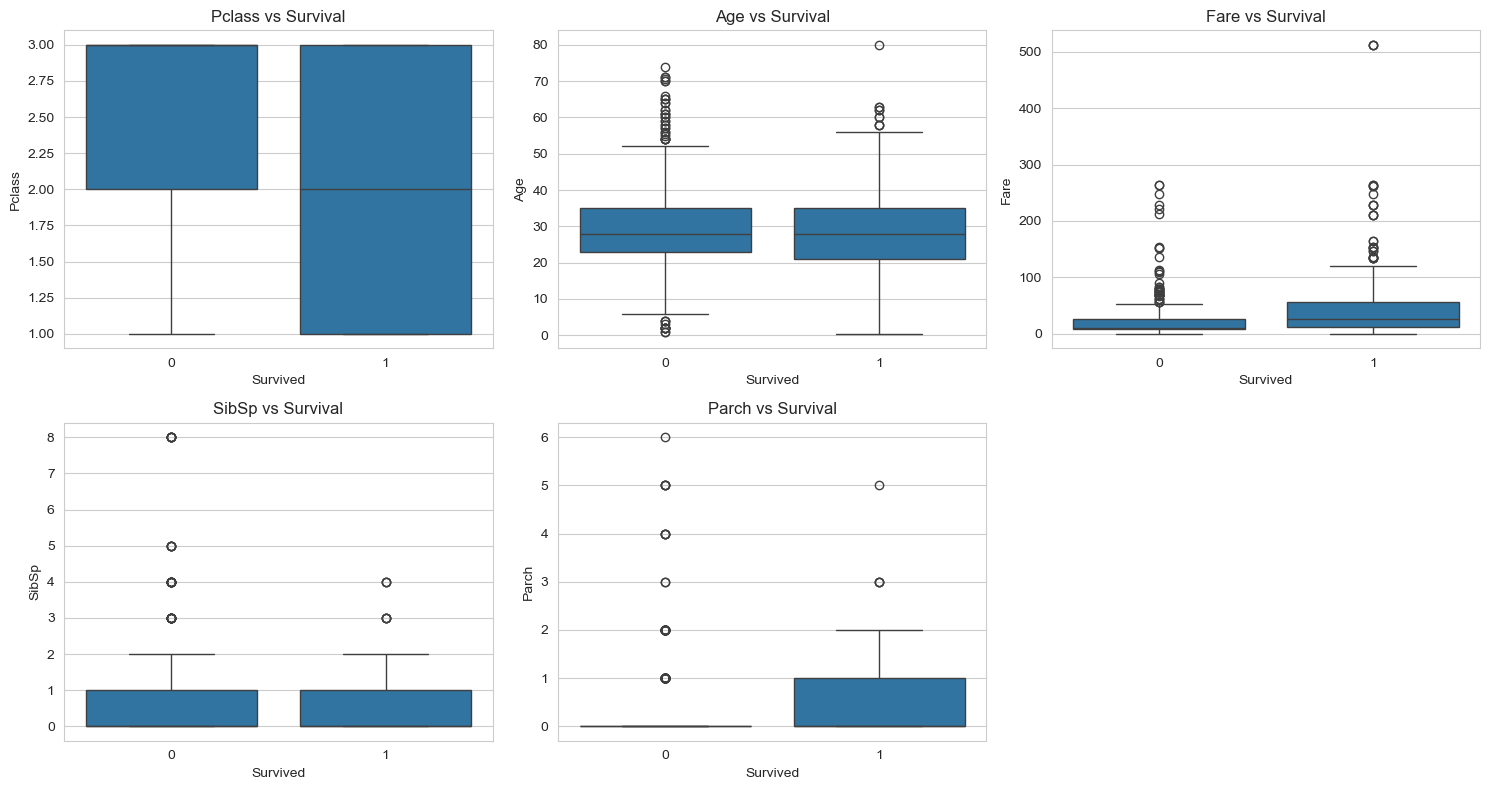

In [11]:
# Feature vs Survival (Subplots)

features = ['Pclass','Age','Fare','SibSp','Parch']

fig, axes = plt.subplots(2, 3, figsize=(15,8))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x='Survived', y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs Survival")
    axes[i].set_xlabel("Survived")
    axes[i].set_ylabel(col)

# Remove extra subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


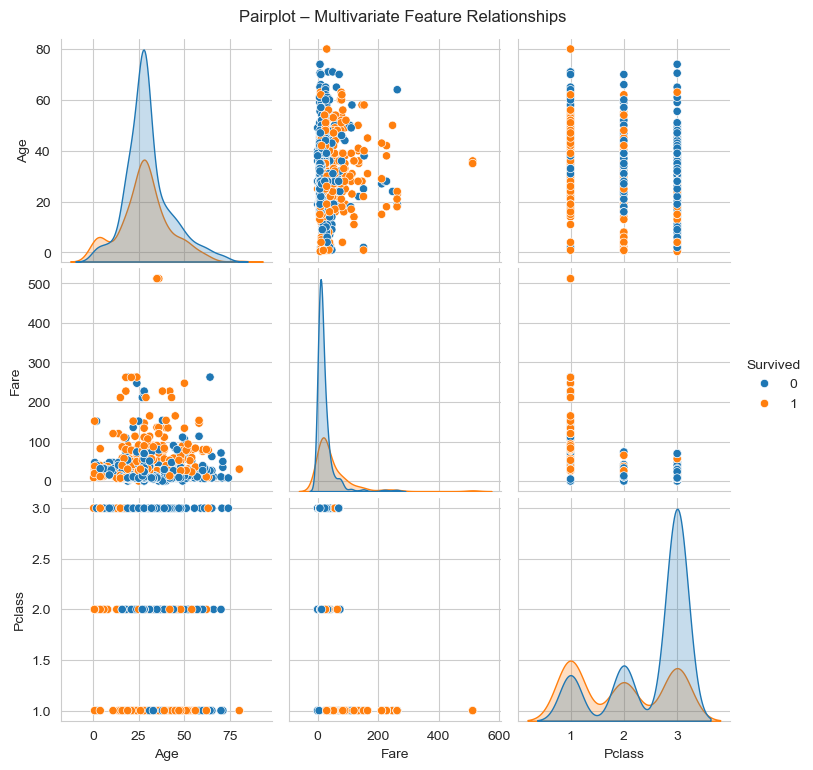

In [18]:
# Pairplot – Multivariate Feature Interaction
sns.pairplot(
    df[['Survived','Age','Fare','Pclass']],
    hue='Survived',
    diag_kind='kde',
    height=2.5
)

plt.suptitle("Pairplot – Multivariate Feature Relationships", y=1.02)
plt.show()

In [19]:
# Feature Importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop(['Survived','Name','Ticket','Cabin'], axis=1)
y = df_encoded['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Extract feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)

# Display top 10 important features
top_features = importances.sort_values(ascending=False).head(10)
top_features


Sex_male       0.257215
Fare           0.193356
PassengerId    0.191336
Age            0.170077
Pclass         0.081342
SibSp          0.045049
Parch          0.030228
Embarked_S     0.023361
Embarked_Q     0.008037
dtype: float64

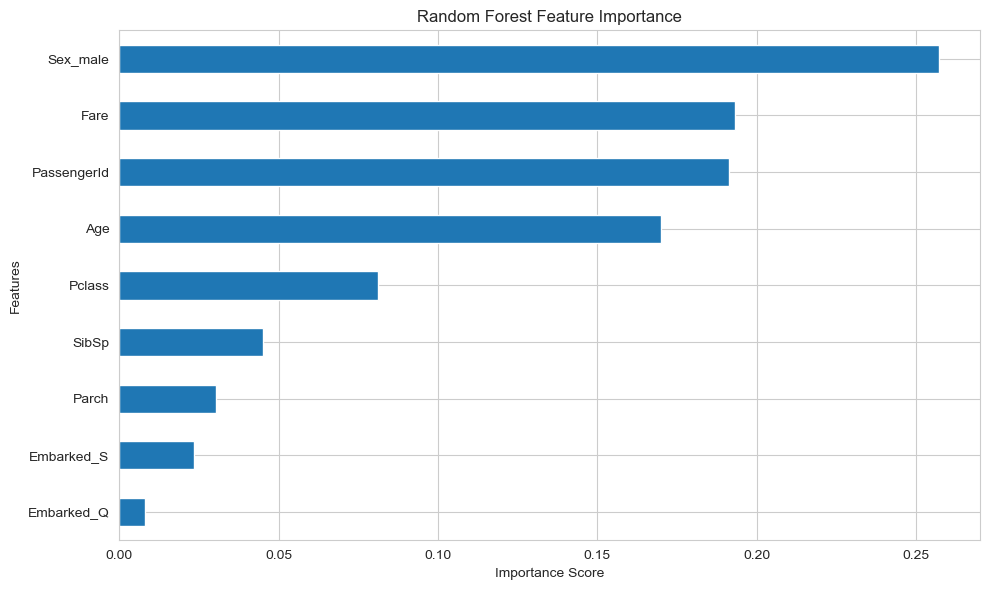

In [20]:
# Feature Importance Visualization

plt.figure(figsize=(10,6))

importances.sort_values().plot(kind='barh')

plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")

plt.tight_layout()
plt.show()


In [17]:
# ## Successfully applied multivariate analysis to uncover key feature interactions,
# identified the most influential variables affecting survival, 
# and built a strong foundation for feature engineering and 
# # machine learning modeling.